# 作業
* 試著模擬出 5 群高斯分布的資料, 並以此觀察 K-mean 與輪廓分析的結果  


https://kknews.cc/zh-tw/other/nernge5.html
    
    2、輪廓圖定量分析聚類質量
輪廓分析(silhouette analysis)，使用圖形工具來度量簇中樣本的聚集程度，除k-means之外也適用於其他的聚類算法。通過三個步驟可以計算出當個樣本的輪廓係數(silhouette coefficient)：

1、將樣本x與簇內的其他點之間的平均距離作為簇內的內聚度a

2、將樣本x與最近簇中所有點之間的平均距離看作是與最近簇的分離度b

3、將簇的分離度與簇內聚度之差除以二者中比較大的數得到輪廓係數，計算公式如下

![公式](p1.jpg)


輪廓係數的取值在-1到1之間。當簇內聚度與分度離相等時，輪廓係數為0。當b>>a時，輪廓係數近似取到1，此時模型的性能最佳。
![code](p2_code.jpg)



通過輪廓圖，我們能夠看出樣本的簇數以及判斷樣本中是否包含異常值。為了評價聚類模型的性能，可以通過評價輪廓係數，也就是圖中的紅色虛線進行評價。
![輪廓](p3.jpg)

 


原文網址：https://kknews.cc/zh-tw/other/nernge5.html

In [2]:
# 載入套件
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.metrics import silhouette_samples, silhouette_score

np.random.seed(5)

%matplotlib inline

In [3]:
# 生成 5 群資料
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=5,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=123) 

In [4]:
# 設定需要計算的 K 值集合
cls= [4,5,6]

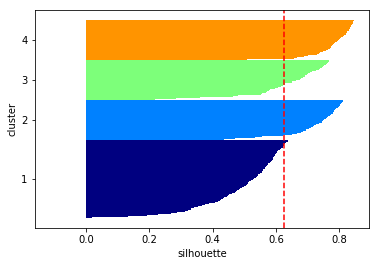

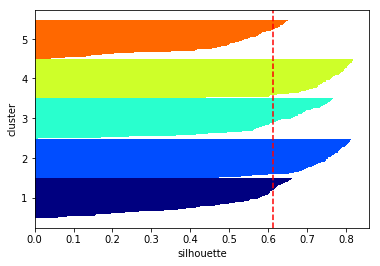

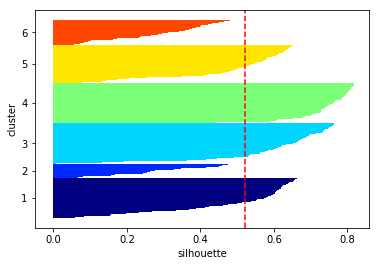

In [35]:
# 計算並繪製輪廓分析的結果

for n in cls:
    '''
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 6))
    ax1.set_xlim([-1, 1])
    ax1.set_ylim([0, len(X) + (n + 1) * 10])
    print(len(X) + (n + 1) * 10)
    '''
    model = KMeans(n_clusters=n, n_init=1,random_state=0)
    y_km = model.fit_predict(X)
    
    # copy from internet
    cluster_labels = np.unique(y_km)
    n_clusters=cluster_labels.shape[0]
    silhouette_vals = silhouette_samples(X, y_km, metric ='euclidean')
    y_ax_lower=0
    y_ax_upper =0
    yticks=[]
    for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km==c]
        c_silhouette_vals.sort()
        y_ax_upper +=len(c_silhouette_vals)
        color = cm.jet(i/n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper),c_silhouette_vals,
                height=1.0, edgecolor='none', color=color)
        yticks.append((y_ax_lower+y_ax_upper)/2)
        y_ax_lower += len(c_silhouette_vals)
    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg,color='red',linestyle='--')
    plt.yticks(yticks, cluster_labels+1)
    plt.ylabel('cluster')
    plt.xlabel('silhouette')
    plt.show()
        
    
